In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [7]:
import random as ran
from IPython.display import clear_output
from src import spotify, dp, utils, DB
import pandas as pd
import math as mt

db = DB()

# K Checking
- 새로운 K의 갯수를 만들 수 있는지 확인하는 과정

In [10]:
seed_musics = db.seed_zone.estimated_document_count()
K = round(mt.sqrt(seed_musics / 2))
print("현재 seed 음악 갯수 : {}".format(seed_musics))
print("K 갯수 : {}".format(K))

현재 seed 음악 갯수 : 131
K 갯수 : 8


In [21]:
_seed_features = db.seed_zone.find({})
seed_features = pd.DataFrame([_ for _ in _seed_features])

seed_features.drop(["_id"], axis=1, inplace=True)
seed_features.rename({"track_id": "id"}, axis=1,inplace=True)

seed_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3UPjb91Fwm7u2tAm92Bk0p,0.554,0.5260,7,-5.210,0.0394,0.8080,0.000000,0.0740,0.230,129.845
1,3gzIK2dGSVvPBiohsTwEWZ,0.639,0.5690,0,-7.236,0.0487,0.0581,0.000169,0.1080,0.616,142.967
2,7tIOwGFRTM08JdAeKOELGp,0.632,0.0378,5,-20.596,0.0583,0.9890,0.935000,0.1120,0.357,121.361
3,2FWquqPNxte8iqZ3ATQG0p,0.403,0.7240,8,-6.064,0.2460,0.3770,0.000000,0.0927,0.428,97.133
4,3dbLT62Cvs46Ju7a8gpr36,0.727,0.8790,9,-1.167,0.1290,0.1240,0.000012,0.2440,0.671,146.959


# Make Norm Features

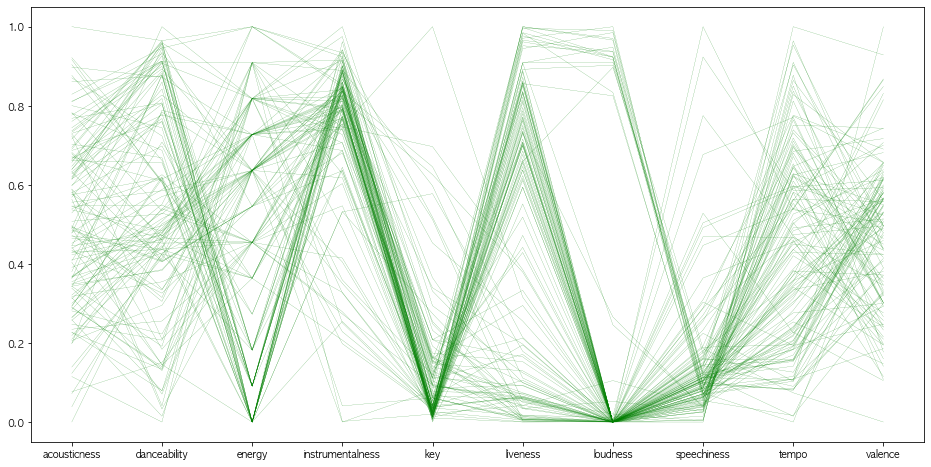

In [26]:
norm_features = dp.make_norm(seed_features)

utils.visual_norm_data(None, norm_features)

# KMeans Run

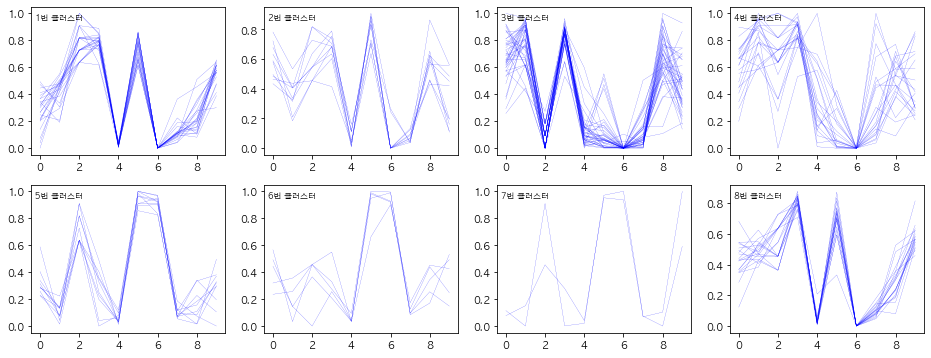

In [580]:
kmeans = utils.KMeans(
    datas=norm_features
)
kmeans.run(early_stop_cnt=5)

clear_output(wait=True)

_label = kmeans.clusters
utils.visual_cluster_data(norm_features, kmeans)

# Clustering 정렬

In [581]:
import random as ran

k_pat = kmeans.K_pattern

ran_k_idx = ran.randrange(0, len(k_pat))
sel_k_pat = np.expand_dims(k_pat[ran_k_idx], axis=0)

print("Select K {}".format(ran_k_idx))
print("Select K pat {}".format(sel_k_pat))

euc_scores = euc(sel_k_pat,k_pat)[0]

print("euc scores : {}".format(
        euc_scores
))

Select K 7
Select K pat [[4.30469144e-01 4.86087203e-01 5.35885167e-01 8.13243419e-01
  3.60424872e-02 7.00529445e-01 1.10012266e-04 1.00477306e-01
  2.86441648e-01 5.77850179e-01]]
euc scores : [0.30573555 0.48324848 0.93269248 0.82343786 1.22531423 1.16053917
 1.36508647 0.        ]


In [582]:
sort_scores = euc_scores.argsort()
sort_scores

array([7, 0, 1, 3, 2, 5, 4, 6])

In [583]:
_label[_label == sort_scores[0]]

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [584]:
change_index_info = list()

for idx,_ in enumerate(sort_scores):
    change_index_info.append({
        "idxes": np.where(_label == _)[0],
        "change": idx
    })

In [585]:
print("변화 전")
print(_label)

변화 전
[7 2 5 3 3 7 2 2 5 2 0 4 0 5 3 0 5 0 5 7 3 3 3 2 2 7 6 3 2 2 4 0 7 7 1 7 7
 1 3 2 3 3 2 0 2 2 2 2 4 0 4 0 4 0 3 7 0 1 7 3 2 2 2 3 2 0 2 2 2 0 0 0 1 4
 4 3 7 7 7 0 1 2 2 2 2 3 2 0 7 2 2 0 0 1 0 4 3 7 7 7 1 0 3 2 2 2 2 2 0 2 2
 0 2 4 1 6 4 1 3 7 0 7 1 3 2 2 2 2 2 3 3]


In [586]:
for info in change_index_info:
    _label[info['idxes']] = info['change']

In [587]:
print("변화 후")
print(_label)

변화 후
[0 4 5 3 3 0 4 4 5 4 1 6 1 5 3 1 5 1 5 0 3 3 3 4 4 0 7 3 4 4 6 1 0 0 2 0 0
 2 3 4 3 3 4 1 4 4 4 4 6 1 6 1 6 1 3 0 1 2 0 3 4 4 4 3 4 1 4 4 4 1 1 1 2 6
 6 3 0 0 0 1 2 4 4 4 4 3 4 1 0 4 4 1 1 2 1 6 3 0 0 0 2 1 3 4 4 4 4 4 1 4 4
 1 4 6 2 7 6 2 3 0 1 0 2 3 4 4 4 4 4 3 3]


In [588]:
kmeans.clusters = _label
kmeans.K_pattern = k_pat[sort_scores]

In [589]:
np.where(_label == sort_scores[0])

(array([ 26, 115]),)

In [590]:
from sklearn.metrics.pairwise import euclidean_distances as euc

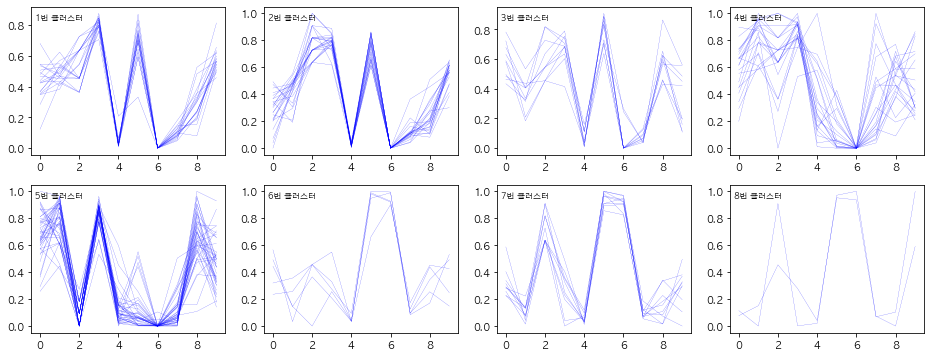

In [591]:
utils.visual_cluster_data(norm_features, kmeans)

In [592]:
labels

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

# Mail Box Matching

In [593]:
music_label = pd.DataFrame(norm_features['id'])
music_label['label'] = _label

music_label.rename({"id": "track_id"}, axis=1,inplace=True)
music_label.head()

,track_id,label
0,3UPjb91Fwm7u2tAm92Bk0p,0
1,3gzIK2dGSVvPBiohsTwEWZ,4
2,7tIOwGFRTM08JdAeKOELGp,5
3,2FWquqPNxte8iqZ3ATQG0p,3
4,3dbLT62Cvs46Ju7a8gpr36,3


In [594]:
_mail_boxes = db.mail_box.find()
mail_boxes = [_ for _ in _mail_boxes]

mail_box_radar = pd.DataFrame(columns=set(_label))

for target_mail_box in mail_boxes:
    target = pd.DataFrame(target_mail_box['tracks'])
    target_label_info = pd.merge(target, music_label,
        on='track_id')
    group_cnt = target_label_info.groupby(['label']).count()['track_id']
    
    mail_box_radar.loc[str(target_mail_box['_id'])] = (group_cnt / len(target_label_info) * 100).round().astype("int")
    
mail_box_radar.fillna(0, inplace=True)
mail_box_radar = mail_box_radar.astype("int")
mail_box_radar.head()

,0,1,2,3,4,5,6,7
623d861aacf38dfa6647bd5c,50,50,0,0,0,0,0,0
623d861aacf38dfa6647bd5d,0,0,0,4,83,9,0,4
623d861aacf38dfa6647bd5e,9,39,12,0,0,6,30,3
623d861aacf38dfa6647bd5f,14,0,0,86,0,0,0,0
623d861bacf38dfa6647bd60,48,21,21,0,0,10,0,0


In [595]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
 
## 데이터 준비
df = pd.DataFrame({
'Character': ['Barbarian','Amazon','Necromancer','Sorceress','Paladin'],
'Strength': [10, 5, 3, 2, 7],
'Dexterity': [4, 10, 3, 3, 8],
'Vitality': [9, 9, 7, 7, 8],
'Energy': [4, 4, 10, 10, 6],
'Wisdom': [2, 6, 8, 9, 8]
})

In [596]:
df.head()

,Character,Strength,Dexterity,Vitality,Energy,Wisdom
0,Barbarian,10,4,9,4,2
1,Amazon,5,10,9,4,6
2,Necromancer,3,3,7,10,8
3,Sorceress,2,3,7,10,9
4,Paladin,7,8,8,6,8


In [597]:
def getRadianFromAngle(angle):
    return pi / 180 * angle


def getX(distance, angle):
    rad = getRadianFromAngle(angle)
    return distance * mt.cos(rad)

def getY(distance, angle):
    rad = getRadianFromAngle(angle)
    return distance * mt.sin(rad)

In [605]:
mail_box_radar = mail_box_radar + 0.1

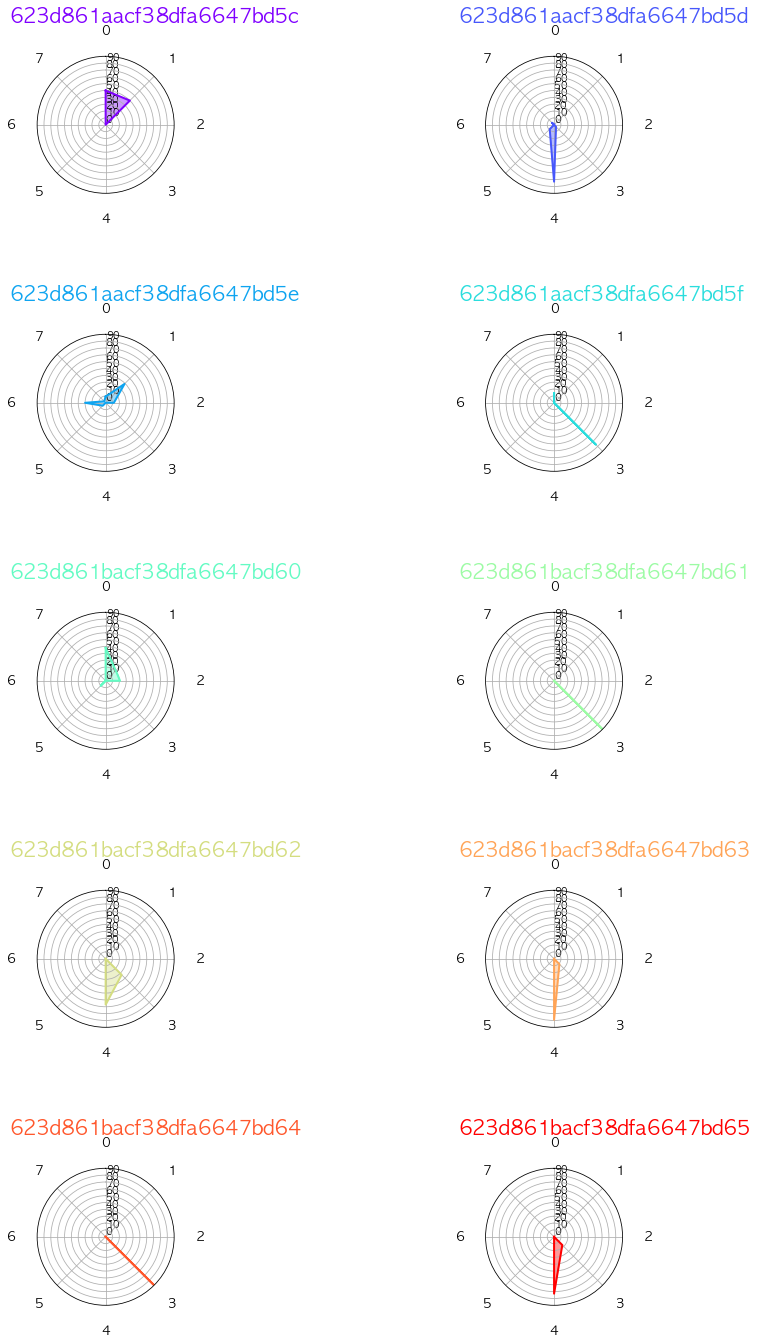

In [606]:
## 따로 그리기
labels = mail_box_radar.columns
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("rainbow", len(mail_box_radar))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in enumerate(mail_box_radar.values):
    color = my_palette(i)
    data = row.tolist()
    data += data[:1] # 원점 데이터
    
    ax = plt.subplot(5,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks(range(0, 100, 10),[str(_) for _ in range(0,100,10)], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,100)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(mail_box_radar.index[i], size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

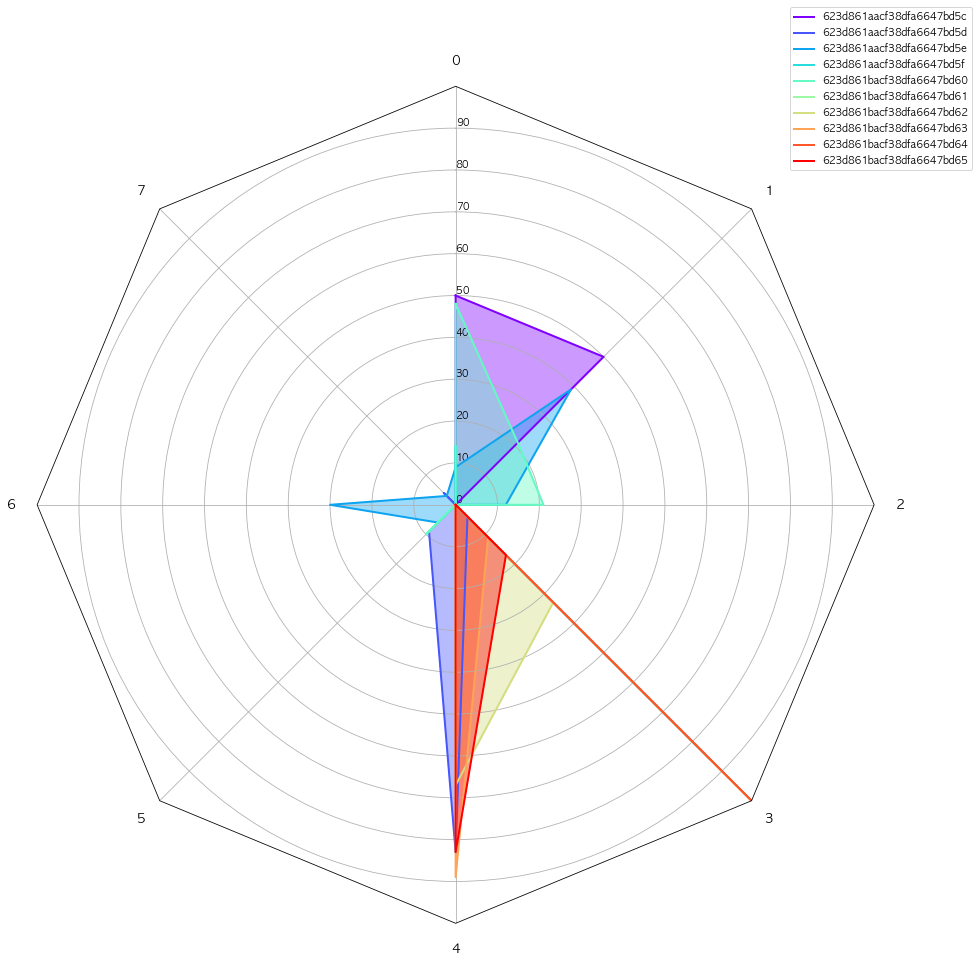

In [607]:
## 따로 그리기
labels = mail_box_radar.columns
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("rainbow", len(mail_box_radar))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)

for i, row in enumerate(mail_box_radar.values):
    color = my_palette(i)
    data = row.tolist()
    data += data[:1] # 원점 데이터
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks(range(0, 100, 10),[str(_) for _ in range(0,100,10)], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,100)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid',
            label=mail_box_radar.index[i]) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
for g in ax.yaxis.get_gridlines(): ## grid line 
    g.get_path()._interpolation_steps = len(labels)
    
spine = Spine(axes=ax,
          spine_type='circle',
          path=Path.unit_regular_polygon(len(labels)))
 
## Axes의 중심과 반지름을 맞춰준다.
spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
           
ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줘야한다.
 
plt.legend(loc=(0.9,0.9))
plt.show()

In [608]:
def get_centroid(point):
    area = 0
    cx = 0
    cy = 0

    for i, _ in enumerate(point):
        j = (i + 1) % len(point)

        pt1 = point[i]
        pt2 = point[j]

        x1, y1 = pt1
        x2, y2 = pt2

        area += x1 * y2
        area -= y1 * x2

        cx += ((x1 + x2) * ((x1 * y2) - (x2 * y1)))
        cy += ((y1 + y2) * ((x1 * y2) - (x2 * y1)))

    area /= 2
    area = abs(area)

    cx = cx / (len(point) * area)
    cy = cy / (len(point) * area)

    return [cx, cy]

In [609]:
# [0.0] 좌표는 무조건 포함하고 나머지는 값이 있는 것들만 포함 시켜야함 (즉, label이 1씩 밀려야 하는 구조인거임)

In [610]:
quadrant_check = [[1, 1], [1, -1],[-1, -1], [-1,1]]

def get_quadrant(angle):
    chk_angle = [0, 90, 180, 270]
    if angle in chk_angle:
        return -1
    else:
        if angle < 90:
            return 0
        elif angle < 180:
            return 1
        elif angle < 270:
            return 2
        elif angle < 360:
            return 3
        
def check_guadrant(angle, point):
    if angle == 0:
        return [0, point[1]]
    elif angle == 90:
        return [point[1],0]
    elif angle == 180:
        return [0, point[1] * -1]
    elif angle == 270:
        return [point[1] * -1, 0]

In [671]:
cent_points = list()

for b_id in mail_box_ids:
    test = mail_box_radar.loc[b_id] + 0.1
    non_zero_labels = test != 0

    sel_idx = test[non_zero_labels].index.values
    x = np.array(angles)[sel_idx]
    y = test[sel_idx].values
    
    point = np.array([[x[i], y[i]] for i,_ in enumerate(x)])
    
    point = point.reshape(-1, 2)

    for idx,pt in enumerate(point):  
        rad = pt[0]
        ang = rad / pi * 180
        dis = pt[1]
#         print(ang)
        quad = get_quadrant(ang)
        if quad == -1:
            point[idx] = check_guadrant(ang, pt)
#             print(check_guadrant(ang, pt))
        else:
            ang = ang % 90
            rad = ang * pi / 180
            
            quad = quadrant_check[quad]
            x = dis * mt.cos(rad) * quad[0]
            y = dis * mt.sin(rad) * quad[1]
            
            point[idx] = [x,y]
#             print([x,y])
    point = np.append(point,[0, 0])
    point = point.reshape(-1, 2)
    
    if len(point) == 2:
        point = np.append(point, [0.1, 0.1])
    point = point.reshape(-1, 2)
    
#     print(point)
#     print(np.array(get_centroid(point)))
#     print()
    cent_points.append(np.array(get_centroid(point)))
    
cent_points = np.array(cent_points)

cent_points

array([[ -7.87234311, -18.98323311],
       [  0.78562504,  19.62243915],
       [ -3.87656551,  -5.12899093],
       [-12.48996608,  12.25099697],
       [ -4.73637523, -10.71256824],
       [-15.7010762 ,  15.70108727],
       [ -5.18541294,  20.0741961 ],
       [ -1.72845596,  21.50592004],
       [-15.7010762 ,  15.70108727],
       [ -2.67126279,  21.11550301]])

In [675]:
max_point = np.identity(len(mail_box_radar.columns)) * 100 * (1/len(mail_box_radar.columns)) + 0.1

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
datas = max_point
cent_max_point = np.array([])

for data in datas:
    point = np.array([[angles[_], data[_]] for _ in range(0, len(data))])
    for idx,pt in enumerate(point):  
        rad = pt[0]
        ang = rad / pi * 180
        dis = pt[1]
        
        quad = get_quadrant(ang)
        if quad == -1:
            point[idx] = check_guadrant(ang, pt)
        else:
            ang = ang % 90
            rad = ang * pi / 180

            quad = quadrant_check[quad]
            x = dis * mt.cos(rad) * quad[0]
            y = dis * mt.sin(rad) * quad[1]

            point[idx] = [x,y]
    
    point = np.append(point,[0, 0])
    point = point.reshape(-1, 2)

    if len(point) == 2:
        point = np.append(point, [0.1, 0.1])
    point = point.reshape(-1, 2)
    
    cent_max_point = np.append(cent_max_point,get_centroid(point))
    
cent_max_point = cent_max_point.reshape(-1, 2)
cent_max_point

array([[-1.49992348e-02, -2.68715172e+00],
       [-1.95212688e+00, -1.95191813e+00],
       [-2.76069899e+00,  1.47609752e-04],
       [-1.95212688e+00,  1.95221335e+00],
       [-6.11419612e-05,  2.76078546e+00],
       [ 1.95200460e+00,  1.95221335e+00],
       [ 2.76057670e+00,  1.47609752e-04],
       [ 1.91070927e+00, -1.88949715e+00]])

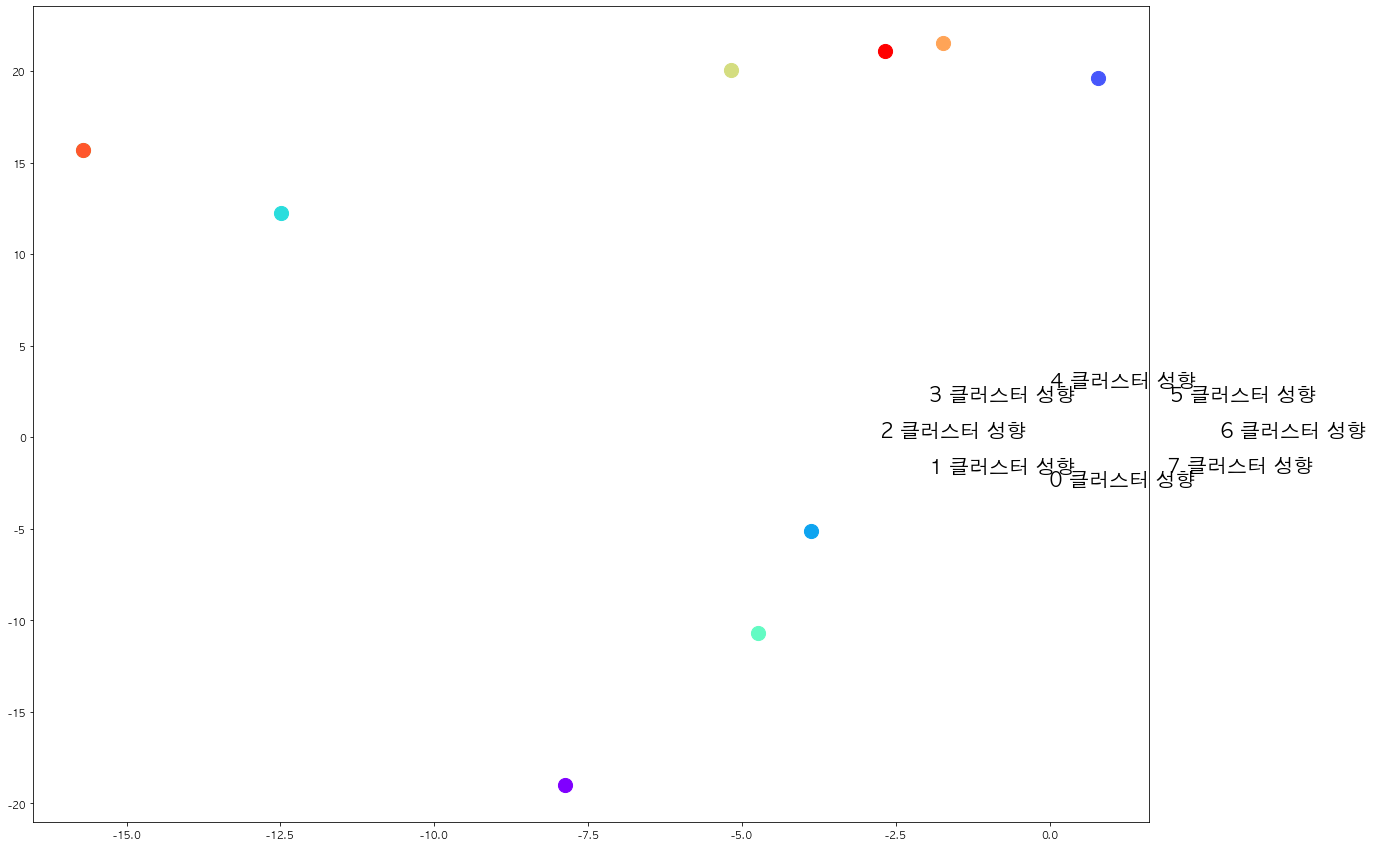

In [676]:
plt.figure(figsize=(20, 15))


for idx, pt in enumerate(cent_points):
    color = my_palette(idx)
    x = pt[0]
    y = pt[1]
    plt.scatter(x, y, s=200, color=color, label=mail_box_radar.index[idx])
    
for idx, pt in enumerate(cent_max_point):
    plt.text(pt[0], pt[1],"{} 클러스터 성향".format(idx), fontsize=20)

# plt.legend()

plt.show()

In [689]:
cent_points = list()

for b_id in mail_box_ids:
    test = mail_box_radar.loc[b_id]
    non_zero_labels = test != 0

    sel_idx = test[non_zero_labels].index.values
    x = np.array(angles)[sel_idx]
    y = test[sel_idx].values
    
    point = np.array([[x[i], y[i]] for i,_ in enumerate(x)])
    
    point = point.reshape(-1, 2)

    for idx,pt in enumerate(point):  
        rad = pt[0]
        ang = rad / pi * 180
        dis = pt[1]
        quad = get_quadrant(ang)
        if quad == -1:
            point[idx] = check_guadrant(ang, pt)
        else:
            ang = ang % 90
            rad = ang * pi / 180
            
            quad = quadrant_check[quad]
            x = dis * mt.cos(rad) * quad[0]
            y = dis * mt.sin(rad) * quad[1]
            
            point[idx] = [x,y]
    point = point.reshape(-1, 2)
    point = point.reshape(-1, 2)
    
    cent_points.append(point.sum(axis=0))
    
cent_points = np.array(cent_points)

cent_points

array([[ 35.35533906,  85.35533906],
       [ -6.36396103, -89.36396103],
       [  3.21320344,  34.45584412],
       [ 60.81118318, -46.81118318],
       [ 28.77817459,  55.77817459],
       [ 70.71067812, -70.71067812],
       [ 23.33452378, -90.33452378],
       [  7.77817459, -96.77817459],
       [ 70.71067812, -70.71067812],
       [ 12.02081528, -95.02081528]])

In [707]:
max_point = np.identity(len(mail_box_radar.columns)) * 100

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
datas = max_point
cent_max_point = np.array([])

for data in datas:
    point = np.array([[angles[_], data[_]] for _ in range(0, len(data))])
    for idx,pt in enumerate(point):  
        rad = pt[0]
        ang = rad / pi * 180
        dis = pt[1]
        
        quad = get_quadrant(ang)
        if quad == -1:
            point[idx] = check_guadrant(ang, pt)
        else:
            ang = ang % 90
            rad = ang * pi / 180

            quad = quadrant_check[quad]
            x = dis * mt.cos(rad) * quad[0]
            y = dis * mt.sin(rad) * quad[1]

            point[idx] = [x,y]
    
    cent_max_point = np.append(cent_max_point,point.sum(axis=0))
    
cent_max_point = cent_max_point.reshape(-1, 2)
cent_max_point

array([[   0.        ,  100.        ],
       [  70.71067812,   70.71067812],
       [ 100.        ,    0.        ],
       [  70.71067812,  -70.71067812],
       [   0.        , -100.        ],
       [ -70.71067812,  -70.71067812],
       [-100.        ,    0.        ],
       [ -70.71067812,   70.71067812]])

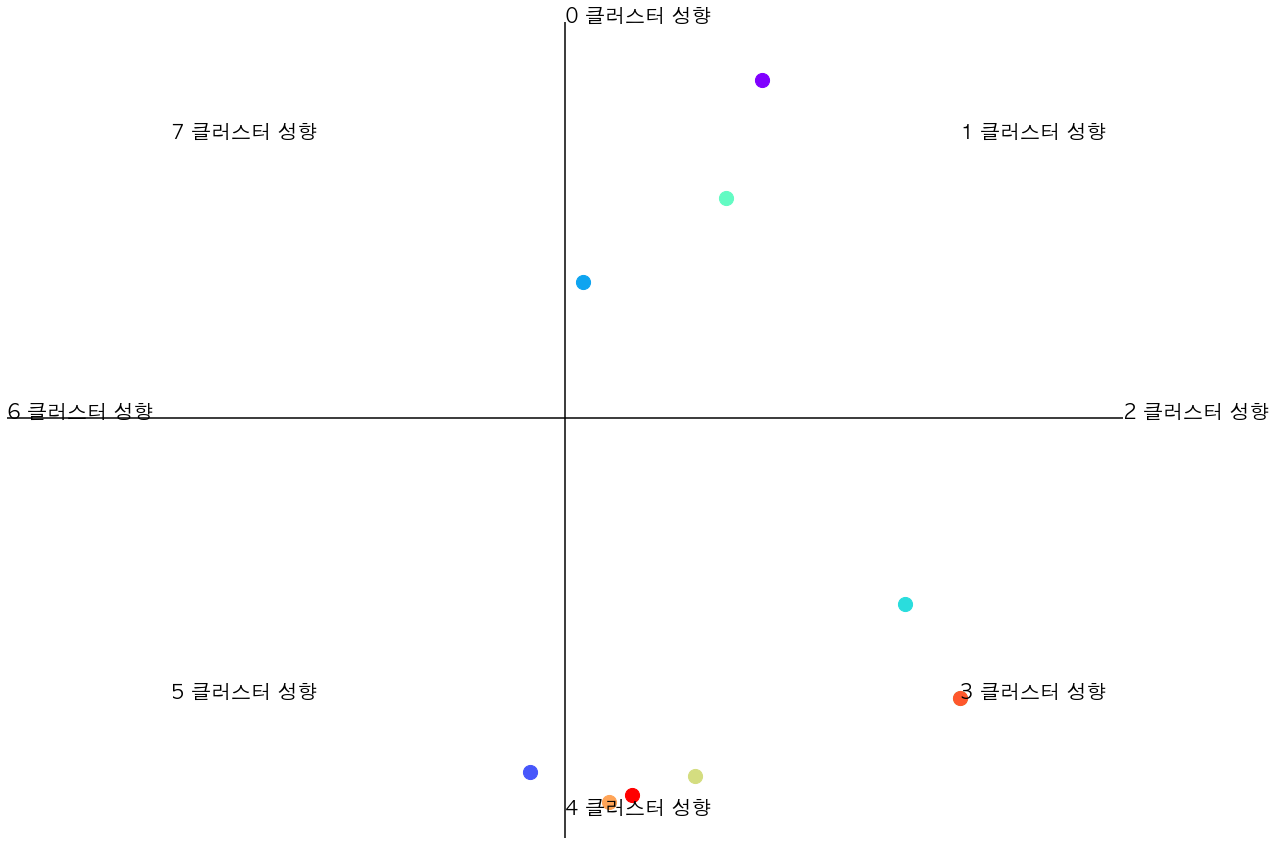

In [724]:
plt.figure(figsize=(20, 15))



for idx, pt in enumerate(cent_points):
    color = my_palette(idx)
    x = pt[0]
    y = pt[1]
    plt.scatter(x, y, s=200, color=color, label=mail_box_radar.index[idx])
    
for idx, pt in enumerate(cent_max_point):
    plt.text(pt[0], pt[1],"{} 클러스터 성향".format(idx), fontsize=20)

plt.xticks([
    cent_max_point[:,0].min(),
    cent_max_point[:,0].max()
])
plt.yticks([
    cent_max_point[:,1].min(),
    cent_max_point[:,1].max()
])

plt.axhline(
    0, color='black'
)
plt.axvline(
    0, color='black'
)
plt.axis("off")
# plt.legend()

plt.show()

In [725]:
mail_box_points = pd.DataFrame(cent_points, columns=['x','y'])

mail_box_points.index = mail_box_ids
mail_box_points

,x,y
623d861aacf38dfa6647bd5c,35.355339,85.355339
623d861aacf38dfa6647bd5d,-6.363961,-89.363961
623d861aacf38dfa6647bd5e,3.213203,34.455844
623d861aacf38dfa6647bd5f,60.811183,-46.811183
623d861bacf38dfa6647bd60,28.778175,55.778175
623d861bacf38dfa6647bd61,70.710678,-70.710678
623d861bacf38dfa6647bd62,23.334524,-90.334524
623d861bacf38dfa6647bd63,7.778175,-96.778175
623d861bacf38dfa6647bd64,70.710678,-70.710678
623d861bacf38dfa6647bd65,12.020815,-95.020815


In [726]:
mail_box_points.iloc[0]

x    35.355339
y    85.355339
Name: 623d861aacf38dfa6647bd5c, dtype: float64